# Stock Market Prediction using Decision Tree

In [1]:
# x) Remove redundant ticker symbols after dataframe is loaded?
# x) Inferences like vaccine stock spike, boom in AI, EV
# x) Combined data from NSE(Indian) and NASDAQ(American) companies
# x) Predictions for future or just last 100 days?
# x) Error/Accuracy/Precision Calculation
# x) Combined data from NSE(Indian) and NASDAQ(American) companies

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn.metrics

from datetime import datetime, timedelta
from dateutil import relativedelta

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

# Data

In [6]:
data = pd.read_csv("NASDAQ Symbols.csv")
data.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AACG,ATA Creativity Global American Depositary Shares,$1.40,-0.05,-3.448%,4.583600e+07,China,2008.0,12942,Consumer Discretionary,Educational Services
1,AACIW,Armada Acquisition Corp. I Warrant,$0.06,0.00,0.00%,0.000000e+00,United States,2021.0,84274,Finance,Blank Checks
2,AADI,Aadi Bioscience Inc. Common Stock,$8.19,0.06,0.738%,2.001389e+08,United States,NaN,84735,Health Care,Biotechnology: Pharmaceutical Preparations
3,AAL,American Airlines Group Inc. Common Stock,$14.93,0.12,0.81%,9.703035e+09,United States,NaN,15840018,Consumer Discretionary,Air Freight/Delivery Services
4,AAME,Atlantic American Corporation Common Stock,$2.15,0.05,2.381%,4.378954e+07,United States,NaN,6947,Finance,Life Insurance


In [7]:
def symbol_search():
    print("---Portfolio Analyis---")
    key1 = "y"
    key2 = ""
    symbols = []
    while key1.lower() == "y":
        search_term = input("Enter the company name:")
        if search_term == "":
            continue
        print("Companies found with matching string to", search_term, "are")
        for index, row in data.iterrows():
            string = row[1]
            if not(pd.isna(string)) and search_term.lower() in str(string).lower(): # Checking for NA values
                flag = 1
                print(string)
                key2 = input("Do you want to add this company? (Y/N)")
                if key2.lower() == "y":
                    symbols.append(row[0])
        if flag != 1:
            print("No matching companies were found.")
        key1 = input("Enter N to exit, Y to continue adding companies")
    return symbols   

In [8]:
# input
# Portfolio Stocks
symbols = symbol_search()

---Portfolio Analyis---
Companies found with matching string to apple are
Apple Inc. Common Stock
Pineapple Energy Inc. Common Stock
Companies found with matching string to tesla are
Tesla Inc. Common Stock


In [10]:
# Upload date
flag  = 0
flag2 = 0
while(flag == 0):
    start = input("Enter the date from which analysis should be started(in yyyy-mm-dd format)")
    end = input("Enter the date from which analysis should end (in yyyy-mm-dd format)")
    d1 = datetime.strptime(start, "%Y-%m-%d")
    d2 = datetime.strptime(end, "%Y-%m-%d")
    delta = d2-d1
    if delta < timedelta(days = 100):
        print("Dates should be more than 100 days apart")
        continue
    else:
        flag = 1       


In [11]:
df2 = pd.DataFrame()
for s in symbols:
    df2[s] = yf.download(s,start,end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
df2.tail()

,AAPL,TSLA
Date,,
2021-12-27,178.768860,364.646667
2021-12-28,177.737839,362.823334
2021-12-29,177.827057,362.063324
2021-12-30,176.657272,356.779999
2021-12-31,176.032745,352.260010


In [13]:
future_days = 100

columns = []
for symbol in symbols:
    column_name = "Prediction_{}".format(symbol)  # Generate column name based on the symbol
    columns.append(column_name)  # Append column name to list
    df2[column_name] = df2[symbol].shift(-future_days)  # Create new column shifted 100 units/rows up

In [15]:
df2.tail()

,AAPL,TSLA,Prediction_AAPL,Prediction_TSLA
Date,,,,
2021-12-27,178.768860,364.646667,NaN,NaN
2021-12-28,177.737839,362.823334,NaN,NaN
2021-12-29,177.827057,362.063324,NaN,NaN
2021-12-30,176.657272,356.779999,NaN,NaN
2021-12-31,176.032745,352.260010,NaN,NaN


In [16]:
df2.head(101)

,AAPL,TSLA,Prediction_AAPL,Prediction_TSLA
Date,,,,
2020-01-02,73.347931,28.684000,78.080223,54.681999
2020-01-03,72.634842,29.534000,78.114586,53.720669
2020-01-06,73.213631,30.102667,78.038513,55.666668
2020-01-07,72.869293,31.270666,78.998215,59.873333
2020-01-08,74.041473,32.809334,79.363930,58.770668
...,...,...,...,...
2020-05-20,78.355141,54.370667,122.356354,147.433334
2020-05-21,77.770950,55.173332,119.110565,148.883331
2020-05-22,78.271698,54.458668,119.199081,153.766663


In [17]:
# Input values
X = np.array(df2.drop(columns, axis = 1))[:-future_days]
print(X)

[[ 73.34793091  28.68400002]
 [ 72.63484192  29.5340004 ]
 [ 73.21363068  30.10266685]
 [ 72.86929321  31.27066612]
 [ 74.04147339  32.8093338 ]
 [ 75.61418152  32.08933258]
 [ 75.78512573  31.87666702]
 [ 77.40423584  34.99066544]
 [ 76.35902405  35.86133194]
 [ 76.03178406  34.56666565]
 [ 76.98419189  34.23266602]
 [ 77.83648682  34.03333282]
 [ 77.30899811  36.47999954]
 [ 77.58495331  37.97066879]
 [ 77.95858765  38.14666748]
 [ 77.73392487  37.6546669 ]
 [ 75.44812012  37.20133209]
 [ 77.58250427  37.79333115]
 [ 79.20648956  38.73266602]
 [ 79.09171295  42.72066879]
 [ 75.58488464  43.37133408]
 [ 75.37728882  52.        ]
 [ 77.86579132  59.13733292]
 [ 78.50073242  48.97999954]
 [ 79.41896057  49.93066788]
 [ 78.33943176  49.87133408]
 [ 78.71150208  51.41866684]
 [ 78.23662567  51.62533188]
 [ 80.09456635  51.152668  ]
 [ 79.5242157   53.59999847]
 [ 79.54379272  53.33533478]
 [ 78.08731842  57.2266655 ]
 [ 79.21821594  61.16133118]
 [ 78.40551758  59.96066666]
 [ 76.63079834

In [18]:
# Output values
y = np.array(df2[columns])[:-future_days]
print(y)

[[ 78.08022308  54.68199921]
 [ 78.11458588  53.72066879]
 [ 78.03851318  55.66666794]
 [ 78.99821472  59.87333298]
 [ 79.36392975  58.77066803]
 [ 79.80082703  58.86399841]
 [ 79.1135788   57.62533188]
 [ 81.36681366  59.04399872]
 [ 81.84790039  63.32799911]
 [ 84.43250275  62.71133423]
 [ 86.60472107  68.33666992]
 [ 82.44680023  64.85600281]
 [ 83.15860748  62.35200119]
 [ 84.18703461  66.05999756]
 [ 86.41818237  65.47533417]
 [ 86.29790497  66.11933136]
 [ 86.33226776  66.93066406]
 [ 85.83892822  66.72666931]
 [ 88.08479309  66.28800201]
 [ 89.96495819  66.78533173]
 [ 88.37687683  64.05666351]
 [ 89.55013275  65.73200226]
 [ 86.79864502  63.98266602]
 [ 88.79906464  67.29000092]
 [ 89.54031372  71.98733521]
 [ 89.37095642  74.64199829]
 [ 89.37095642  80.57733154]
 [ 91.76165009  91.4386673 ]
 [ 91.47692108  92.65733337]
 [ 93.6074295   91.05867004]
 [ 94.00997162  92.95200348]
 [ 94.17442322 102.97666931]
 [ 93.73996735  99.80400085]
 [ 95.29121399 101.12000275]
 [ 95.94656372

# Linear and Decision Tree Regression

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [22]:
# Create empty dictionaries to store the models
lr_models = {}
tree_models = {}

# Iterate over the columns of x_train and y_train
for i in range(x_train.shape[1]):
    column_x = x_train[:, i]
    column_y = y_train[:, i]

    # Train Linear Regression model
    lr_model = LinearRegression().fit(column_x.reshape(-1, 1), column_y.reshape(-1, 1))
    lr_models[i] = lr_model
    
    # Train Decision Tree Regression model
    tree_model = DecisionTreeRegressor().fit(column_x.reshape(-1, 1), column_y.reshape(-1, 1))
    tree_models[i] = tree_model

# Prediction using Linear Model

In [25]:
x_future = df2.drop(columns, axis = 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future.shape

(100, 2)

In [26]:
lr_prediction = {}
for i in range(x_future.shape[1]):
    lr_prediction[i] = lr_models[i].predict(x_future[:,i].reshape(-1, 1))
    print(lr_prediction[i])
len(lr_prediction)

[[135.02852623]
 [137.39275413]
 [136.80169984]
 [135.09806045]
 [135.44574229]
 [135.87685658]
 [136.00203215]
 [134.96595458]
 [136.53050941]
 [137.12156907]
 [139.13813664]
 [139.3536911 ]
 [140.52886399]
 [142.2394552 ]
 [144.07519509]
 [142.85136491]
 [145.06957794]
 [143.40071372]
 [145.11826748]
 [144.88183072]
 [145.35467199]
 [144.15171337]
 [144.42289305]
 [143.33812056]
 [144.99310267]
 [145.27125029]
 [145.04177071]
 [144.47852903]
 [144.40898944]
 [143.00434771]
 [143.75533661]
 [140.49407807]
 [140.66794318]
 [141.80833552]
 [142.28895121]
 [139.94854657]
 [139.29380231]
 [137.10663854]
 [138.63904731]
 [140.36647232]
 [139.54455669]
 [138.55545893]
 [138.44400955]
 [140.26895882]
 [138.95944881]
 [140.12268588]
 [139.98338088]
 [139.94854657]
 [138.85497275]
 [138.38828755]
 [138.15842086]
 [138.70173187]
 [137.64298161]
 [139.27987181]
 [139.28683975]
 [139.87192613]
 [140.14357894]
 [139.43310731]
 [140.29681982]
 [142.47702103]
 [141.89190777]
 [142.24714358]
 [143.38

2

In [27]:
predictions2 = {}
valid2 = df2[X.shape[0]:]
for i in range(x_future.shape[1]):
    predictions2[i] = lr_prediction[i]
    symbol=symbols[i]
    column_name = "Test_Prediction_{}".format(symbol)  # Generate column name based on the symbol
    valid2[column_name] = predictions2[i]  # Append column name to list

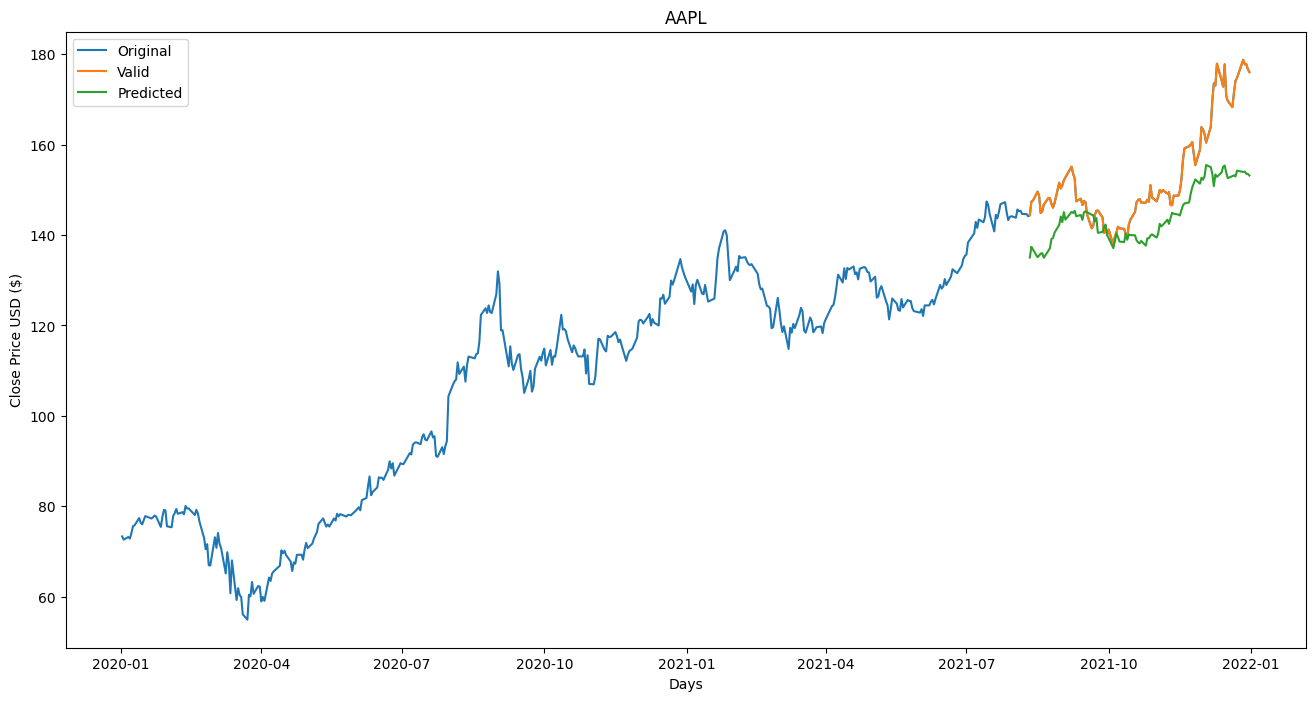

The MSE is  123.64785954058826
The RMSE is  11.119705910705925
The MAE is  8.965379932181195
The mean is 153.17100875854493


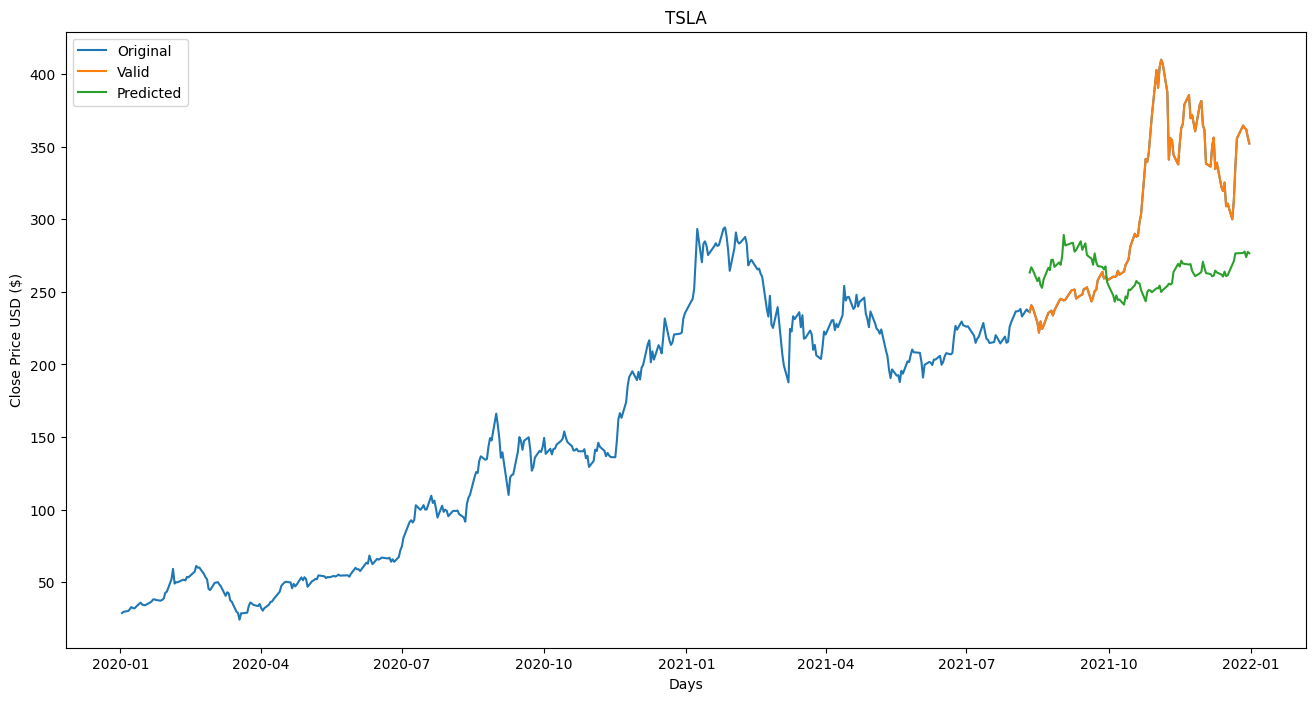

The MSE is  4936.715331874017
The RMSE is  70.26176294311165
The MAE is  58.04264506026259
The mean is 302.58453369140625


In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = rmse = mae = r2 = 0


for symbol in symbols:
    test_symbol = "Test_Prediction_{}".format(symbol)  # Generate column name based on the symbol
    plt.figure(figsize=(16,8))
    plt.title(symbol)
    plt.xlabel("Days")
    plt.ylabel("Close Price USD ($)")
    plt.plot(df2[symbol])
    plt.plot(valid2[[symbol,test_symbol]])
    rmse = np.sqrt(mse)
    plt.legend(["Original", "Valid", "Predicted"])
    plt.show()
    mae = mean_absolute_error(valid2[symbol], valid2[test_symbol])
    mse = mean_squared_error(valid2[symbol], valid2[test_symbol])
    rmse = np.sqrt(mse)
    print("The MSE is ", mse)
    print("The RMSE is ", rmse)
    print("The MAE is ", mae)
    print("The mean is", (valid2[symbol].mean()))

# Prediction using Decision Trees

In [29]:
tree_prediction = {}
for i in range(x_future.shape[1]):
    tree_prediction[i] = tree_models[i].predict(x_future[:,i].reshape(-1, 1))
    print(tree_prediction[i])
len(tree_prediction)

[144.38653564 130.78265381 147.59379578 149.59339905 148.67279053
 144.88148499 145.2180481  143.8344574  148.19764709 148.10853577
 146.86126709 146.04954529 147.09886169 149.97035217 150.29621887
 150.96934509 152.09783936 152.74125671 155.10714722 153.54309082
 152.51358032 147.46511841 148.03924561 146.62368774 147.52449036
 147.28692627 152.09783936 141.49604797 141.98106384 150.96934509
 145.34677124 145.43582153 143.90148926 143.95307922 141.38713074
 142.57006836 141.20896912 137.73442078 139.68450928 124.45161438
 141.84249878 141.4564209  141.36732483 140.08047485 139.48652649
 142.30773926 142.57006836 142.57006836 147.25721741 147.75216675
 147.9699707  147.1879425  147.13842773 147.34632874 147.34632874
 151.02874756 148.28672791 147.45523071 148.50450134 149.95967102
 149.43501282 149.97035217 149.13760376 149.50440979 145.34677124
 146.58985901 148.69151306 148.70141602 141.98106384 152.16120911
 123.97715759 159.16007996 159.62600708 160.01264954 160.53805542
 155.45245

2

In [30]:
predictions = {}
valid = df2[X.shape[0]:]
for i in range(x_future.shape[1]):
    predictions[i] = tree_prediction[i]
    symbol=symbols[i]
    column_name = "Test_Prediction_{}".format(symbol)  # Generate column name based on the symbol
    valid[column_name] = predictions[i]  # Append column name to list

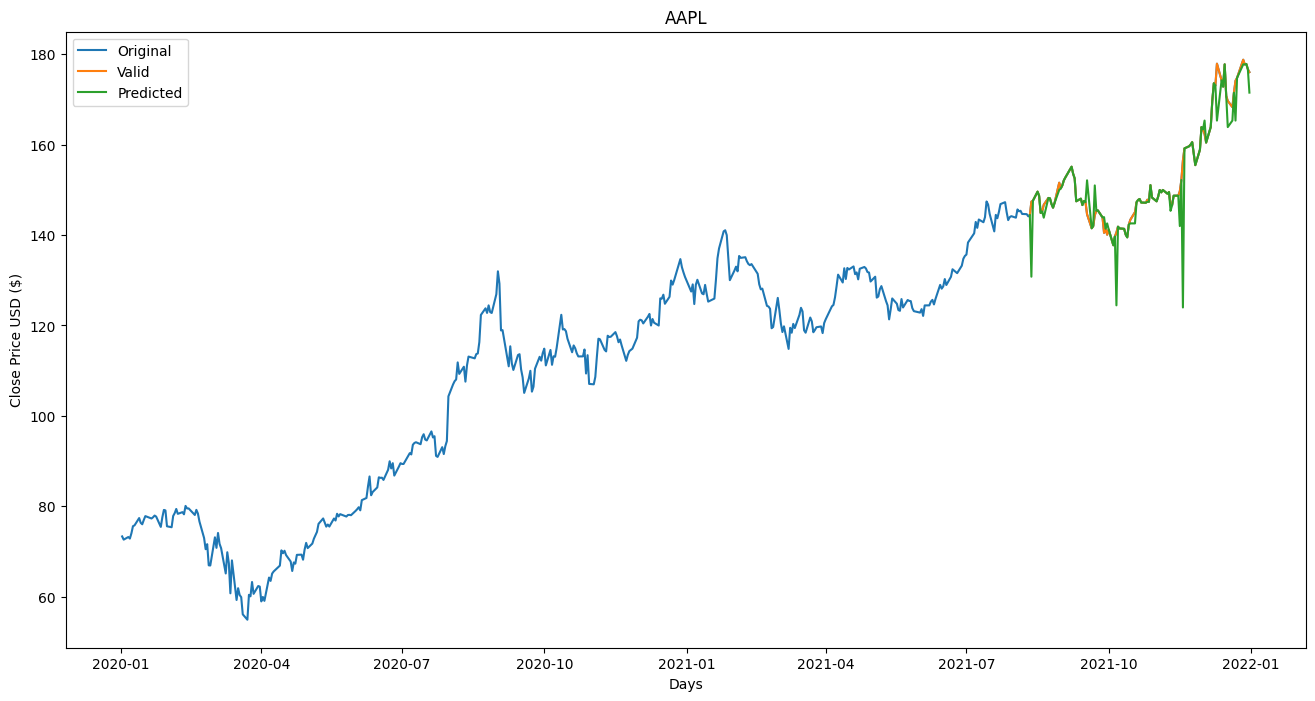

The MSE is  20.99311733729206
The RMSE is  4.581824673347078
The MAE is  1.4125480651855469
The mean is 153.17100875854493


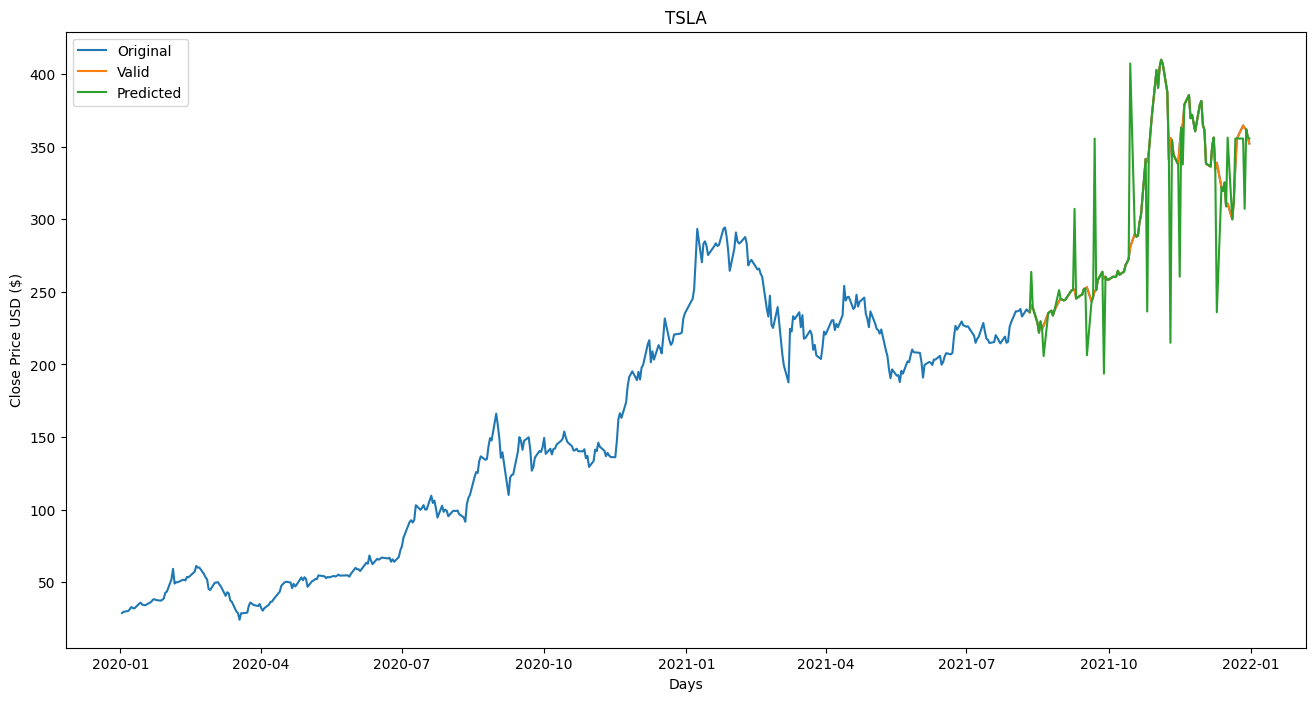

The MSE is  934.2975669132476
The RMSE is  30.566281535594864
The MAE is  10.501166229248048
The mean is 302.58453369140625


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = rmse = mae = r2 = 0


for symbol in symbols:
    test_symbol = "Test_Prediction_{}".format(symbol)  # Generate column name based on the symbol
    plt.figure(figsize=(16,8))
    plt.title(symbol)
    plt.xlabel("Days")
    plt.ylabel("Close Price USD ($)")
    plt.plot(df2[symbol])
    plt.plot(valid[[symbol,test_symbol]])
    plt.legend(["Original", "Valid", "Predicted"])
    plt.show()
    mae = mean_absolute_error(valid[symbol], valid[test_symbol])
    mse = mean_squared_error(valid[symbol], valid[test_symbol])
    rmse = np.sqrt(mse)
    print("The MSE is ", mse)
    print("The RMSE is ", rmse)
    print("The MAE is ", mae)
    print("The mean is", (valid[symbol].mean()))
